# Prueba pandas y tuits

Esta es una prueba para ver qué información me muestra pandas con mis tuitazos.

In [6]:
import pandas as pd
mis_tuits = pd.read_json("/home/pi/tweet.js", encoding="UTF-8")

In [2]:
# Pandas por default tiene un max_colwidth, por eso lo aumentamos.
pd.options.display.max_colwidth = 280

In [7]:
# Las máscaras sirven para filtrar datos.
mask_2011 = mis_tuits.created_at.dt.year==2016
mask_2012 = mis_tuits.created_at.dt.year==2012
mask_month_10 = mis_tuits.created_at.dt.month<=7

In [4]:
# df.col_name.str.contains("str") permite buscar una cadena en cada fila
mask_aniuxa = mis_tuits.full_text.str.contains("aniuxa")

Para usar las máscaras se hace lo siguiente:
```python
my_dataframe[mask]
```

In [9]:
tuits_filtrados = (
    mis_tuits[-mask_aniuxa & mask_2011]
    .sort_values(by="created_at")[["id","created_at","full_text"]]
)

#mask_conocer = tuits_filtrados.full_text.str.contains("conocer")
#tuits_filtrados = tuits_filtrados[mask_conocer]
tuits_filtrados["url"] = "https://twitter.com/statuses/"+tuits_filtrados.id.astype('U')

# Para obtener la longitud de c/u de los registros, se usa apply
# df.col_name.apply(len)
#tuits_filtrados["tamano_str"]=tuits_filtrados.full_text.apply(len)

# Para obtener el máximo valor de una columna
#tuits_filtrados["tamano_str"].max()

# df.count() regresa un numpy.int64 con .item se convierte a int
numero_filas = tuits_filtrados["id"].count().item()

# Para cambiar el número de columnas que pandas muestra
# pd.options.display.max_rows = numero_filas

#para reordenar las columnas del dataframe
tuits_filtrados = tuits_filtrados.reindex(columns=(['url'] + list([a for a in tuits_filtrados.columns if a != 'url']) ))
tuits_filtrados.shape[0]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0

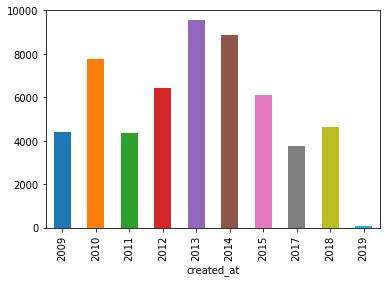

In [6]:
%matplotlib inline
#Graficando por año
rango_anios = range(2009, 2018, 1)
#for current_yr in rango_anios:
#    current_mask = mis_tuits.created_at.dt.year==current_yr
mask_aniuxa = mis_tuits.full_text.str.contains("aniuxa")
(mis_tuits[-mask_aniuxa]
     .groupby(mis_tuits.created_at.dt.year)     
).size().plot(kind='bar')

In [7]:
#Revisando el día que tuiteé más.
rango_anios = range(2009, 2018, 1)
#for current_yr in rango_anios:
#    current_mask = mis_tuits.created_at.dt.year==current_yr
mask_aniuxa = mis_tuits.full_text.str.contains("aniuxa")
(mis_tuits[-mask_aniuxa]
     .groupby(mis_tuits.created_at.dt.date)     
)\
    .size()\
    .sort_values(ascending=False)\
    .head(15)

created_at
2012-12-01    107
2010-02-04     89
2010-01-06     77
2013-02-19     77
2011-11-12     75
2010-11-14     74
2010-03-08     73
2013-01-16     72
2012-08-11     71
2014-03-26     70
2010-01-26     66
2010-01-09     66
2012-11-18     66
2013-07-10     65
2010-01-05     65
dtype: int64

In [9]:
mis_tuits.shape

(60209, 20)

In [41]:
import pandas as pd
tuits_csv = pd.read_csv("/home/pi/tweets.csv", encoding="UTF-8", header=0)
tuits_csv.shape

(60404, 10)

In [49]:
tuits_csv["timestamp"] = pd.to_datetime(tuits_csv["timestamp"])

mask_anio = tuits_csv.timestamp.dt.year==2015
mask_aniuxa = tuits_csv.text.str.contains("aniuxa")
mask_mostri = tuits_csv.text.str.contains("mostri")
mask_fijado = tuits_csv.tweet_id==490301888676368384
mantener = mask_aniuxa | mask_fijado | mask_mostri
tuits_csv = tuits_csv[mask_anio & -mantener]

#(
#    tuits_csv
#    .groupby(
#        tuits_csv.timestamp.dt.year
#    )
#    .agg(["count"])
#)

mantener = mask_aniuxa | mask_fijado

print(tuits_csv[mask_anio & mask_mes & -mantener].shape[0])

0


In [49]:
tuits_csv.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls'],
      dtype='object')

# Para conectarse a twitter

In [50]:
import twitter
api = twitter.Api(
    consumer_key='fj3VTJfDcc5IAKWPiqpe7ZCrk',
    consumer_secret='1rp4GHOVhlYgJcbzurGTflPL4u44VaZlWhGDiRXV35FLNlPwee',                  
    access_token_key='18753114-rUUcyLWreP5P8BXqLnmVZw3FrgNZqdeFS33Vn3ID2',
    access_token_secret='PBqjzHnz9rKrEpIeaalotPZkdEsw15U96Qf52vuQRIxoP'    
)
api.InitializeRateLimit()

In [39]:
import pandas as pd
tuits_csv = pd.read_csv("/home/pi/tweets.csv", encoding="UTF-8", header=0)

tuits_csv["timestamp"] = pd.to_datetime(tuits_csv["timestamp"])

mask_anio = tuits_csv.timestamp.dt.year==2009
#mask_mes = tuits_csv.timestamp.dt.month<7
mask_aniuxa = tuits_csv.text.str.contains("aniuxa")
mask_mostri = tuits_csv.text.str.contains("mostri")
mask_fijado = tuits_csv.tweet_id==490301888676368384
mantener = mask_aniuxa | mask_fijado | mask_mostri
tuits_csv = tuits_csv[mask_anio & mask_mes & -mantener]
rem_calls=tuits_csv[mask_anio & -mantener].shape[0]
#tuits_csv.sort_values(by='tweet_id', axis=1, ascending = True)
df_borrar=tuits_csv["tweet_id"].head(rem_calls)
print(tuits_csv.shape[0])
#total_borrados = total_borrados + rem_calls
error = 0
for this_tweet in df_borrar:
    try:
        objeto_status = api.DestroyStatus(this_tweet, trim_user=True)
        print("Eliminando tweet con ID: "+str(this_tweet))
    except:
        print("Hubo un error con el tuit id " + str(this_tweet))
        error += 1
    if ( error == 10 ):
        break
    tuits_csv=tuits_csv[tuits_csv.tweet_id!=this_tweet]
    
#tuits_csv.to_csv("/home/pi/tuits_restantes.csv", sep=',', encoding='utf-8')
print(tuits_csv.shape[0])

0
0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [65]:
import pandas as pd
tuits_csv = pd.read_csv("/home/pi/tweets.csv", encoding="UTF-8", header=0)
tuits_csv.shape[0]
mask_mostri = tuits_csv.text.str.contains("mostri|aniuxa")
tuits_csv = tuits_csv[mask_mostri]
tuits_csv["timestamp"] = pd.to_datetime(tuits_csv["timestamp"])
print(tuits_csv.shape[0])
tuits_csv.sort_values('timestamp', ascending = True)

4606


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls
45998,76700822083354625,7.669997e+16,38813185.0,2011-06-03 17:24:35,"<a href=""https://dabr.co.uk"" rel=""nofollow"">Da...",@Kyuutz ¿Sólo @aniuxa es la que querías recome...,NaN,NaN,NaN,NaN
45995,76706406614577152,7.670572e+16,38813185.0,2011-06-03 17:46:47,"<a href=""https://dabr.co.uk"" rel=""nofollow"">Da...",@Kyuutz @freudchicken @aniuxa Hasta parecen eq...,NaN,NaN,NaN,NaN
45992,76710204112257024,7.670999e+16,38813185.0,2011-06-03 18:01:52,"<a href=""https://dabr.co.uk"" rel=""nofollow"">Da...",@Kyuutz @aniuxa A mi también me recordó a Spid...,NaN,NaN,NaN,NaN
45936,77927923583168513,7.792713e+16,261567919.0,2011-06-07 02:40:39,"<a href=""http://www.hootsuite.com"" rel=""nofoll...","@aniuxa A mi me pasa con tuny, que todas las c...",NaN,NaN,NaN,NaN
45923,78549260345417728,7.854897e+16,38813185.0,2011-06-08 19:49:37,"<a href=""https://dabr.co.uk"" rel=""nofollow"">Da...",@Kyuutz @rufianmelancoli @aniuxa Yo pido queja...,NaN,NaN,NaN,NaN
45862,79768401924472832,7.976702e+16,261567919.0,2011-06-12 04:34:03,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",@aniuxa *las choca con @aniuxa*,NaN,NaN,NaN,NaN
45861,79769558310854656,7.976894e+16,261567919.0,2011-06-12 04:38:39,"<a href=""http://www.hootsuite.com"" rel=""nofoll...","@aniuxa Yep, sólo que éste, en lugar de acorde...",NaN,NaN,NaN,NaN
45567,94656081883701248,9.465482e+16,261567919.0,2011-07-23 06:32:23,"<a href=""http://www.hootsuite.com"" rel=""nofoll...","@aniuxa Oh por dios, ¡tu ícono es animado! ¿Es...",NaN,NaN,NaN,NaN
45566,94657009152032768,9.465670e+16,261567919.0,2011-07-23 06:36:04,"<a href=""http://www.hootsuite.com"" rel=""nofoll...","@aniuxa Ah, es que desde que vi el corto anima...",NaN,NaN,NaN,NaN
45558,94819944713306112,9.481943e+16,261567919.0,2011-07-23 17:23:31,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",@aniuxa No puedo evitar pensar en doble sentid...,NaN,NaN,NaN,NaN


In [52]:
rem_calls = api.CheckRateLimit(url="https://api.twitter.com/1.1/application/rate_limit_status.json").remaining

In [53]:
rem_calls

180

In [8]:
try:
    5+"a"
except Exception as e:
    print (e)

unsupported operand type(s) for +: 'int' and 'str'


In [1]:
[letra.upper() if letra.lower() not in ['a', 'e', 'i', 'o', 'u'] else letra.lower() for letra in 'chapultepec']

['C', 'H', 'a', 'P', 'u', 'L', 'T', 'e', 'P', 'e', 'C']

In [35]:
[
	letra.upper() + "--"
	if letra.lower() not in ['a']
    else "ZZ"
    if letra.lower() not in ['c']
    else "KK"
    for letra in 'chapultepec' #3
]

['C--', 'H--', 'ZZ', 'P--', 'U--', 'L--', 'T--', 'E--', 'P--', 'E--', 'C--']